(444500,)


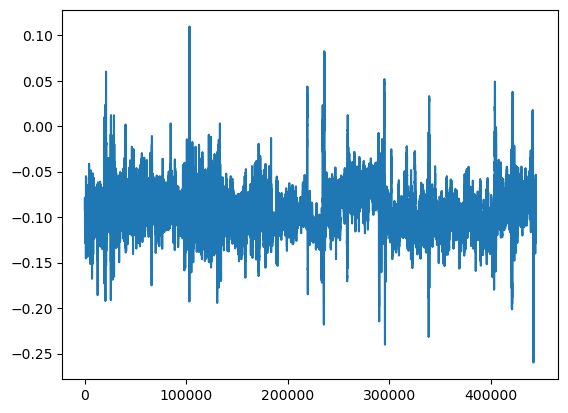

<Figure size 1400x800 with 0 Axes>

In [129]:
import os
import pickle
import numpy as np
import pandas as pd
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join, isdir
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.ndimage
from ACC import ACCprep

#Extracting the data from the 
data_set_path = "WESAD/"
subject = ["S2",'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']

class read_data_of_one_subject:
    """Read data from WESAD dataset"""
    def __init__(self, path, subject):
        self.keys = ['label', 'subject', 'signal']
        self.signal_keys = ['wrist', 'chest']
        self.chest_sensor_keys = ['ACC', 'ECG', 'EDA', 'EMG', 'Resp', 'Temp']
        self.wrist_sensor_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
        #os.chdir(path)
        #os.chdir(subject)
        with open(path + subject +'/'+subject + '.pkl', 'rb') as file:
            data = pickle.load(file, encoding='latin1')
        self.data = data

    def get_labels(self):
        return self.data[self.keys[0]]

    def get_wrist_data(self):
        """"""
        #label = self.data[self.keys[0]]
        assert subject == self.data[self.keys[1]]
        signal = self.data[self.keys[2]]
        wrist_data = signal[self.signal_keys[0]]
        #wrist_ACC = wrist_data[self.wrist_sensor_keys[0]]
        #wrist_ECG = wrist_data[self.wrist_sensor_keys[1]]
        return wrist_data

    def get_chest_data(self):
        """"""
        signal = self.data[self.keys[2]]
        chest_data = signal[self.signal_keys[1]]
        return chest_data
    

#print(len(subject))
fs = 700


obj_data = {}

obj_data[subject[2]] = read_data_of_one_subject(data_set_path, subject[2])
#print(obj_data[subject[i]].data)
chest_data_dict = obj_data[subject[2]].get_chest_data()

labels = obj_data[subject[2]].get_labels() 
baseline = np.asarray([idx for idx,val in enumerate(labels) if val == 1])
stress = np.asarray([idx for idx,val in enumerate(labels) if val == 2])

acc_data_stress=chest_data_dict['ACC'][stress]
ecg_data_stress=chest_data_dict['ECG'][stress,0]


acc_data_base=chest_data_dict['ACC'][baseline]



plt.plot(acc_data_stress[:,1])
print(np.shape(acc_data_stress[:,1]))

plt.figure(figsize=(14,8))
#plt.plot(acc_data_stress[:,1])
plt.show()



-0.002483494641755317 0.00248334612011345
10512
0
-0.006859470242810386 0.006862472665263738
11069
608
-0.00916616531780356 0.009159953133666554
10654
0


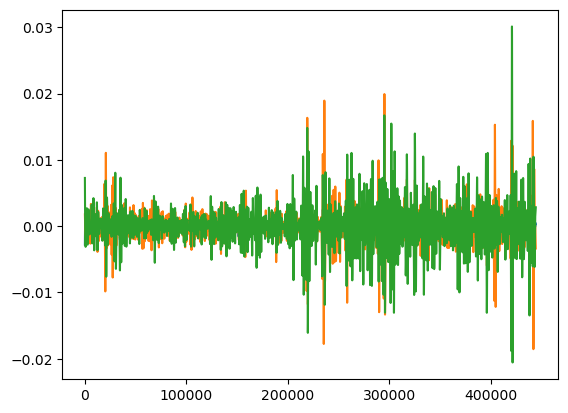

In [166]:
total_indices =  np.zeros(1)
for i in range(0,3,1):
    ACC = ACCprep(fs, acc_data_stress[:,i], "")
    acc_filtered = ACC.filtering_data(acc_data_stress[:,i])

    threshold_up = np.mean(acc_filtered) + 2.7*np.std(acc_filtered)
    threshold_down = np.mean(acc_filtered) - 2.7*np.std(acc_filtered)
    print(threshold_down, threshold_up)

    indices = (np.logical_or((acc_filtered > threshold_up),(acc_filtered < threshold_down))).astype(int)

    print(np.sum(indices))

    i = 20000
    print(np.sum(indices[i-750:i+750]))
    #plt.plot((acc_filtered * (indices).astype(int))[15000:40000])

    fixed_indices = np.zeros(np.shape(indices))
    thresh = 2*fs # 2 seconds on either side
    for i in range(len(indices)-(thresh//2)):
        if( np.sum(indices[i-(thresh//2):i+(thresh//2)]) != 0):
            fixed_indices[i] = 0
        else:
            fixed_indices[i] = 1
        
    plt.plot(acc_filtered)
    #plt.plot(threshold_up*fixed_indices)

    total_indices = np.logical_or(indices, total_indices)



#Fixed indices done for one of the three ACC. Repeat for the other three, merge together, multiply with ech signal and then remove 0s from those signals

444500

(444453, 1)
(444500,)
[0.05 0.05 0.05 ... 0.   0.   0.  ]
0


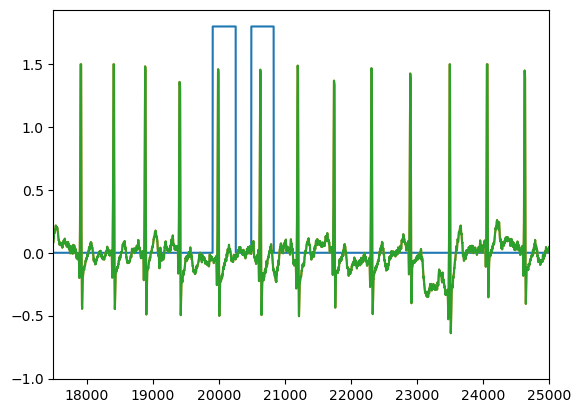

In [179]:
print(len(total_indices))
ecg_data_stress = np.array(ecg_data_stress)
ecg_data_stress = np.reshape( ecg_data_stress, (len(ecg_data_stress),1))

ecg_data_stress = ecg_data_stress[:len(total_indices)]

print()
print(np.shape(ecg_data_stress[0:444500]))

print(np.shape(total_indices))

plt.plot(1.8*total_indices)
print(0.05*total_indices)
plt.xlim([17500,25000])

print(np.sum(ecg_data_stress == 0))
ecg_data = [item for item in ecg_data_stress if item != 0]
plt.plot(ecg_data)
plt.plot(ecg_data_stress)

